In [1]:
import pandas as pd

In [5]:
df_fake = pd.read_csv('../ML/Fake.csv')
df_fake['Category'] = 0
df_true = pd.read_csv('../ML/True.csv')
df_true['Category'] = 1

In [7]:
df = pd.concat([df_fake, df_true])

In [9]:
df.head()

,title,text,subject,date,Category
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [11]:

# shuffle the dataframe
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

print(df.head())


                                               title  \
0  Ben Stein Calls Out 9th Circuit Court: Committ...   
1  Trump drops Steve Bannon from National Securit...   
2  Puerto Rico expects U.S. to lift Jones Act shi...   
3   OOPS: Trump Just Accidentally Confirmed He Le...   
4  Donald Trump heads for Scotland to reopen a go...   

                                                text       subject  \
0  21st Century Wire says Ben Stein, reputable pr...       US_News   
1  WASHINGTON (Reuters) - U.S. President Donald T...  politicsNews   
2  (Reuters) - Puerto Rico Governor Ricardo Rosse...  politicsNews   
3  On Monday, Donald Trump once again embarrassed...          News   
4  GLASGOW, Scotland (Reuters) - Most U.S. presid...  politicsNews   

                  date  Category  
0    February 13, 2017         0  
1       April 5, 2017          1  
2  September 27, 2017          1  
3         May 22, 2017         0  
4       June 24, 2016          1  


In [13]:
df.columns

Index(['title', 'text', 'subject', 'date', 'Category'], dtype='object')

In [17]:
import nltk
nltk.download("punkt_tab")


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\ehmed\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [42]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# download required NLTK resources
nltk.download("stopwords")
nltk.download("punkt")
nltk.download("wordnet")
nltk.download("omw-1.4")

stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    if pd.isnull(text):
        return ""
    
    # lowercase
    text = text.lower()
    
    # remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)
    
    # remove punctuation and numbers
    text = re.sub(r"[^a-z\s]", "", text)
    
    # tokenize
    words = nltk.word_tokenize(text)
    
    # remove stopwords & lemmatize
    words = [lemmatizer.lemmatize(w, pos = 'v') for w in words if w not in stop_words]
    
    return " ".join(words)

# apply cleaning
df["title_clean"] = df["title"].apply(clean_text)
df["text_clean"] = df["text"].apply(clean_text)

# combine into one column
df["content"] = df["title_clean"] + " " + df["text_clean"]

print(df[["title", "title_clean", "content"]].head())


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ehmed\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ehmed\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ehmed\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ehmed\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


                                               title  \
0  Ben Stein Calls Out 9th Circuit Court: Committ...   
1  Trump drops Steve Bannon from National Securit...   
2  Puerto Rico expects U.S. to lift Jones Act shi...   
3   OOPS: Trump Just Accidentally Confirmed He Le...   
4  Donald Trump heads for Scotland to reopen a go...   

                                         title_clean  \
0  ben stein call th circuit court commit coup dt...   
1  trump drop steve bannon national security council   
2  puerto rico expect us lift jones act ship rest...   
3  oops trump accidentally confirm leak israeli i...   
4      donald trump head scotland reopen golf resort   

                                             content  
0  ben stein call th circuit court commit coup dt...  
1  trump drop steve bannon national security coun...  
2  puerto rico expect us lift jones act ship rest...  
3  oops trump accidentally confirm leak israeli i...  
4  donald trump head scotland reopen golf resort ..

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer

# use the "content" column you created earlier
vectorizer = TfidfVectorizer(max_features=5000)  # limit vocab size
X = vectorizer.fit_transform(df["content"])
y = df["Category"]  # your labels (0 = true, 1 = fake)


In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9878619153674832
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4696
           1       0.98      0.99      0.99      4284

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



In [50]:
train_acc = model.score(X_train, y_train)
test_acc = model.score(X_test, y_test)

print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)


Train Accuracy: 0.9917311654323737
Test Accuracy: 0.9878619153674832


In [52]:
from sklearn.metrics import classification_report

print("Train Report:\n", classification_report(y_train, model.predict(X_train)))
print("Test Report:\n", classification_report(y_test, model.predict(X_test)))


Train Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     18785
           1       0.99      0.99      0.99     17133

    accuracy                           0.99     35918
   macro avg       0.99      0.99      0.99     35918
weighted avg       0.99      0.99      0.99     35918

Test Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      4696
           1       0.98      0.99      0.99      4284

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



In [54]:
df

,title,text,subject,date,Category,title_clean,text_clean,content
0,Ben Stein Calls Out 9th Circuit Court: Committ...,"21st Century Wire says Ben Stein, reputable pr...",US_News,"February 13, 2017",0,ben stein call th circuit court commit coup dt...,st century wire say ben stein reputable profes...,ben stein call th circuit court commit coup dt...
1,Trump drops Steve Bannon from National Securit...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"April 5, 2017",1,trump drop steve bannon national security council,washington reuters us president donald trump r...,trump drop steve bannon national security coun...
2,Puerto Rico expects U.S. to lift Jones Act shi...,(Reuters) - Puerto Rico Governor Ricardo Rosse...,politicsNews,"September 27, 2017",1,puerto rico expect us lift jones act ship rest...,reuters puerto rico governor ricardo rossello ...,puerto rico expect us lift jones act ship rest...
3,OOPS: Trump Just Accidentally Confirmed He Le...,"On Monday, Donald Trump once again embarrassed...",News,"May 22, 2017",0,oops trump accidentally confirm leak israeli i...,monday donald trump embarrass country accident...,oops trump accidentally confirm leak israeli i...
4,Donald Trump heads for Scotland to reopen a go...,"GLASGOW, Scotland (Reuters) - Most U.S. presid...",politicsNews,"June 24, 2016",1,donald trump head scotland reopen golf resort,glasgow scotland reuters us presidential candi...,donald trump head scotland reopen golf resort ...
...,...,...,...,...,...,...,...,...
44893,UNREAL! CBS’S TED KOPPEL Tells Sean Hannity He...,,politics,"Mar 27, 2017",0,unreal cbss ted koppel tell sean hannity hes b...,,unreal cbss ted koppel tell sean hannity hes b...
44894,PM May seeks to ease Japan's Brexit fears duri...,LONDON/TOKYO (Reuters) - British Prime Ministe...,worldnews,"August 29, 2017",1,pm may seek ease japan brexit fear trade visit,londontokyo reuters british prime minister the...,pm may seek ease japan brexit fear trade visit...
44895,Merkel: Difficult German coalition talks can r...,BERLIN (Reuters) - Chancellor Angela Merkel sa...,worldnews,"November 16, 2017",1,merkel difficult german coalition talk reach deal,berlin reuters chancellor angela merkel say ge...,merkel difficult german coalition talk reach d...
44896,Trump Stole An Idea From North Korean Propaga...,Jesus f*cking Christ our President* is a moron...,News,"July 14, 2017",0,trump steal idea north korean propaganda parod...,jesus fcking christ president moron satisfy si...,trump steal idea north korean propaganda parod...


In [33]:
import shap

# create explainer for linear models
explainer = shap.LinearExplainer(model, X_train, feature_perturbation="interventional")

# explain a few predictions from test set
shap_values = explainer.shap_values(X_test[:10])

# get feature names (words)
feature_names = vectorizer.get_feature_names_out()

# visualize for first sample
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0], feature_names=feature_names)


C:\Users\ehmed\AppData\Roaming\Python\Python312\site-packages\shap\explainers\_linear.py:99: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)


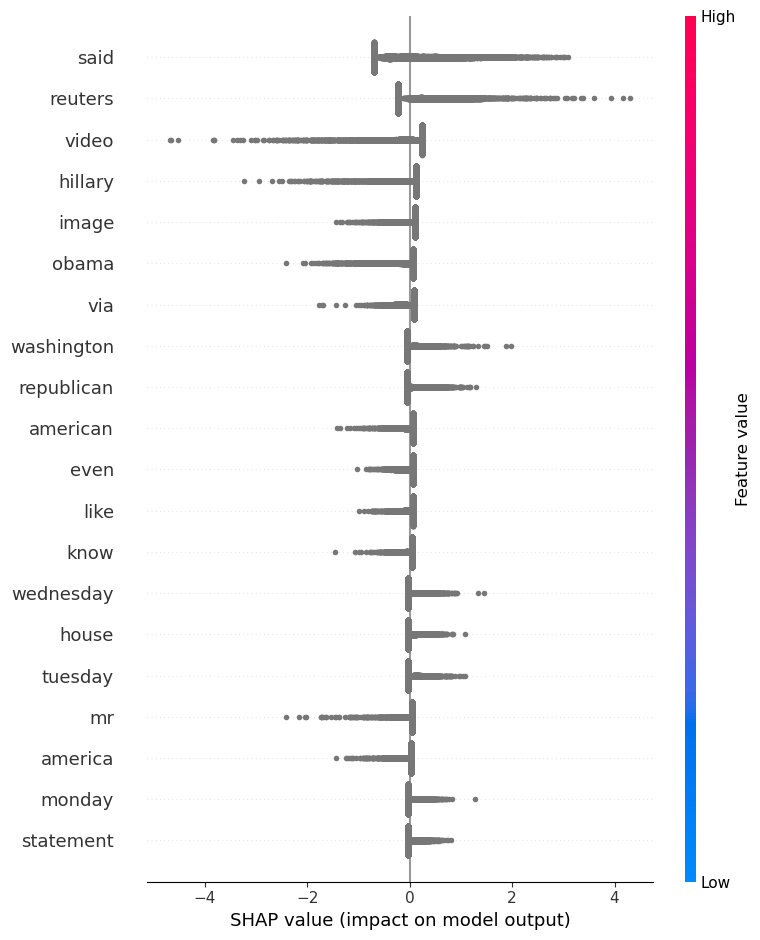

In [35]:
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, feature_names=feature_names)


In [56]:
#shap.plots.waterfall(shap_values_ebm[sample_ind])

In [64]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": MultinomialNB(),
    "Linear SVM": LinearSVC(),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(f"\n{name} Results:")
    print("Accuracy:", accuracy_score(y_test, preds))
    print(classification_report(y_test, preds))


Logistic Regression Results:
Accuracy: 0.9878619153674832
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4696
           1       0.98      0.99      0.99      4284

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980


Naive Bayes Results:
Accuracy: 0.9329621380846325
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      4696
           1       0.93      0.93      0.93      4284

    accuracy                           0.93      8980
   macro avg       0.93      0.93      0.93      8980
weighted avg       0.93      0.93      0.93      8980


Linear SVM Results:
Accuracy: 0.9948775055679288
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      4696
           1       0.99      1.00      0.99      4284

    accuracy          

In [60]:
# Models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

# Other utilities (if needed)
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report
